<div style="display:block" direction=rtl align=right><br><br>
    <div  style="width:100%;margin:100;display:block"  display=block align=center>
        <img width=130 align=right src="https://i.ibb.co/yXKQmtZ/logo1.png" style="margin:0;" />
        <img width=170 align=left  src="https://i.ibb.co/wLjqFkw/logo2.png" style="margin:0;" />
        <span><br><font size=5>University of Tehran , school of ECE</font></span>
        <span><br><font size=3>Data Analytics Course</font></span>
        <span><br><font size=3>Fall 2022</font></span>
    </div><br><br><br>
    <div style="display:block" align=left display=block> 
        <font size=3>Homework 1</font><br>
        <hr />
        <font size=3>TA: <a href="mailto:mesbahamirhossein@gmail.com">Amirhossein Mesbah</a><br></font><br>
    </div>
</div>

>⚠ <b>
به علت داشتن نام متغیرهای مشابه لطفا برای اجرای هر قسمت از سوال، از ابتدای هر بخش، به انضمام بخش کتابخانه که در زیر آمده است اجرا شود
</b>

### import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import string

# Numpy

### Question1: mean and std of numbers between 10 and 1000.

In [2]:
rv = np.arange(10,1000+1)
print("Average : ", rv.mean())
print("standard deviation : ", rv.std())

Average :  505.0
standard deviation :  286.07691273501956


### Question2: nearest point to each random point.

**Generation**

In [3]:
points = np.random.uniform(1000, size = (100,10))
points.shape

(100, 10)

**Calculations**

A distance matrix is a square matrix that captures the pairwise distances between a set of vectors.
<br> in this question when we speak about the distance between vectors, we are referring to their euclidean distance.
<br>Mathematically, we can define euclidean distance between two vectors $u , $v :
$$ \left \| u-v \right \| = \sqrt{\sum_{k=1}^{d}\left ( {u_{k}}^{} -v_{k}^{}\right ) ^{2}} $$
where d is the dimensionality (size) of the vectors.

<br><br> we need to compute the distances between all points in this question so These distances can be stored in an (n,n) matrix dist.

$$ dist_{ij} = \sqrt{u_i^{2}-2u_iv_j+v_j^{2}}$$

where $dist_{ij}$ represents the distance between the ith point and the jth point.


- `euclidean_distance_matrix`: a numpy array for distance between each point.
- `euclidean_distance_index`: a numpy array for index of points which is nearest to this cell point.
<br>fill diagonal by inf value because the nearest point is itself and we don't want that.

In [4]:
x2 = np.sum(points**2, axis=1) 
xy = np.matmul(points, points.T)
y2 = x2.reshape(-1, 1)
euclidean_distance_matrix = np.sqrt(np.round(y2 - 2*xy + x2,5))
np.fill_diagonal(euclidean_distance_matrix ,float('inf') )
euclidean_distance_index = np.argmin(euclidean_distance_matrix, axis=1)

>**⚠ WARNING**: 
>This loop is just for better display, calculations are done without loops


In [5]:
for j,i in enumerate(euclidean_distance_index):
    print('The closest point to %d point is %d point.'%(j ,i))

The closest point to 0 point is 56 point.
The closest point to 1 point is 58 point.
The closest point to 2 point is 67 point.
The closest point to 3 point is 28 point.
The closest point to 4 point is 78 point.
The closest point to 5 point is 9 point.
The closest point to 6 point is 41 point.
The closest point to 7 point is 57 point.
The closest point to 8 point is 62 point.
The closest point to 9 point is 91 point.
The closest point to 10 point is 90 point.
The closest point to 11 point is 81 point.
The closest point to 12 point is 70 point.
The closest point to 13 point is 65 point.
The closest point to 14 point is 47 point.
The closest point to 15 point is 26 point.
The closest point to 16 point is 81 point.
The closest point to 17 point is 45 point.
The closest point to 18 point is 33 point.
The closest point to 19 point is 44 point.
The closest point to 20 point is 46 point.
The closest point to 21 point is 47 point.
The closest point to 22 point is 10 point.
The closest point to 2

### Question3: Histogram of distances.

I use upper triangle of an euclidean distance matrix because show distance just one time.

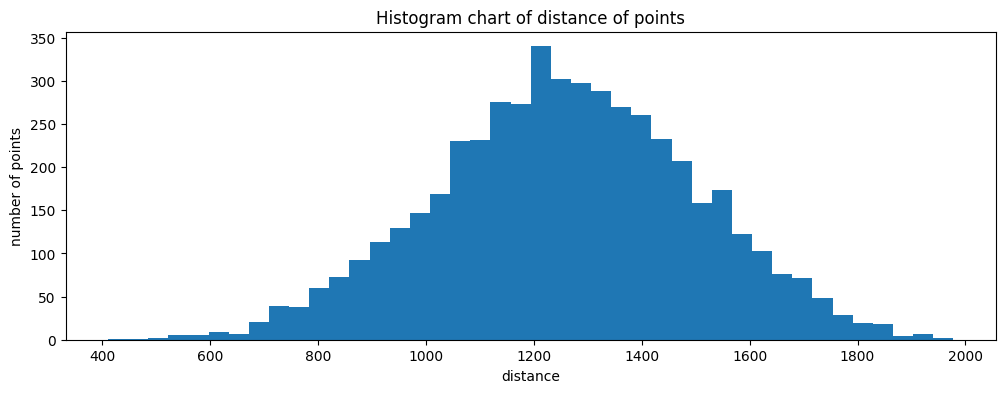

In [6]:
np.triu(euclidean_distance_matrix)
tri_upper_diag = np.triu(euclidean_distance_matrix, k=0)
tri_upper_diag[np.tril_indices(tri_upper_diag.shape[0], -1)] = np.nan

np.fill_diagonal(tri_upper_diag ,'nan')
np.fill_diagonal(euclidean_distance_matrix ,'nan')

plt.figure(figsize=(12,4))
plt.hist(np.ravel(tri_upper_diag),bins='auto')
plt.xlabel('distance')
plt.ylabel('number of points')
plt.title("Histogram chart of distance of points") 
plt.show()

### Question4:

Execute the cell below. By running this cell, a dataset will be loaded from `patents.csv` file. In this notebook, you are asked to analyze this data in several ways. There are three numpy arrays in this dataset:

- `patent_number`: a unique identifier for each patetnt
- `patent features`: a vector of 16 features describing several properties of each patent
- `category`: the category to which a patent belongs


In [7]:
# folder path
df = pd.read_csv('data/patents.csv')

patent_number = df['publication_number'].to_numpy()
patent_features = df['patent_embedding'].to_numpy()
temp = []
for i in range(patent_features.size):
    s = str(patent_features[i])
    s1 = s.replace(r'\n', '')
    temp.append(
        np.array(s.split()[1:-1], dtype='float')[:16]
    )

patent_features = np.stack(temp)
patent_category = df['category']

> Note: The method mentioned in the previous section for question 2 is used here


add origin point to patent_features and calculate distance matrix

In [8]:
origin = np.zeros((1, patent_features.shape[1]))
patent_features = np.concatenate((patent_features, origin), axis=0)

In [9]:
x2 = np.sum(patent_features**2, axis=1) 
xy = np.matmul(patent_features, patent_features.T)
y2 = x2.reshape(-1, 1)
euclidean_distance_matrix = np.sqrt(np.round(y2 - 2*xy + x2,10))
np.fill_diagonal(euclidean_distance_matrix ,float('-inf') )
euclidean_distance_index = np.argmax(euclidean_distance_matrix, axis=1)

#### Part1: Which patent has the highest norm? (Eucledian distance from origin)

In [10]:
euclidean_distance_index[-1]

10839

delete what I add before for cleaning data

In [11]:
patent_features = np.delete(patent_features, (-1), axis=0)
euclidean_distance_matrix = np.delete(euclidean_distance_matrix, (-1), axis=0)
euclidean_distance_matrix = np.delete(euclidean_distance_matrix, (-1), axis=1)

#### Part 2: Find the two patents that are the farthest from eachother

use euclidean distance matrix which calculated in previous part

In [12]:
result = np.where(euclidean_distance_matrix == np.amax(euclidean_distance_matrix))
result[0]

array([1661, 9236])

#### Part 3: Write a function that, given a patent number, finds its nearest neighbour.

In [13]:
def nearest_neighbor(patent_features,index):
    np.fill_diagonal(euclidean_distance_matrix ,float('inf') )
    euclidean_distance_index_min = np.argmin(euclidean_distance_matrix, axis=1)
    return euclidean_distance_index_min[index]

nearest_neighbor(patent_features,3)

1026

#### Part 4: How many patents have a nearest neighbour that is in the same category?

In [14]:
def myfunc(a, b):
    if a == b:
        return 1
    else:
        return 0

- `patent_category_2`: a array for showing category of its nearest neighbor.

In [15]:
np.fill_diagonal(euclidean_distance_matrix ,float('inf') )
patent_category_2 = patent_category[np.argmin(euclidean_distance_matrix, axis=1)]
vfunc = np.vectorize(myfunc)
vfunc(patent_category, patent_category_2).sum()/2

6500.0

#### Part 5: What is the average and std of distances between every pair of patents within a category? Using these calculated quantities, which cluster do you think is more condensed? Which one is more scattered?

In [16]:
patent_category = np.array(patent_category)
patent_features = np.array(patent_features)

Using the numpy split function, the points of each category were placed in a separate list and the distance matrix was calculated for each category as before.

In [17]:
arr1inds = patent_category.argsort()
sorted_arr1 = patent_category[arr1inds]
sorted_arr2 = patent_features[arr1inds]
A = np.split(sorted_arr2, np.unique(sorted_arr1, return_index=True)[1][1:])

dist = []

for i in range(len(A)):
    point_cat = np.array(A[i])
    x2 = np.sum(point_cat**2, axis=1) 
    xy = np.matmul(point_cat, point_cat.T)
    y2 = x2.reshape(-1, 1)
    euclidean_distance_matrix = np.sqrt(np.round(y2 - 2*xy + x2,10))
    a = euclidean_distance_matrix.shape[0]
    tri_upper_diag = euclidean_distance_matrix[np.triu_indices(a, k=1)]
    dist.append(tri_upper_diag)
    print('Mean is %.4f and Standard deviation is %.4f for Category %d '%(dist[i].mean(),dist[i].std(),i))

Mean is 0.1311 and Standard deviation is 0.0396 for Category 0 
Mean is 0.1024 and Standard deviation is 0.0305 for Category 1 
Mean is 0.1411 and Standard deviation is 0.0438 for Category 2 
Mean is 0.1389 and Standard deviation is 0.0446 for Category 3 
Mean is 0.1362 and Standard deviation is 0.0401 for Category 4 
Mean is 0.1347 and Standard deviation is 0.0423 for Category 5 
Mean is 0.1040 and Standard deviation is 0.0318 for Category 6 
Mean is 0.1306 and Standard deviation is 0.0384 for Category 7 


#### Conclusion
<br>Because we have the distance between the points; so the lower the average caused the higher the density.
<br>On the other hand, the standard deviation is also a correct measure to observe the distribution of points in each category.
<br>So, the densest category is the one that has the lowest mean and standard deviation.
<br>which means category 1 is the densest category and category 2 and 3 the most scattered category.

# Working with different Data Files

## .txt

read "zen_of_python.txt" file

In [18]:
# folder path
with open('./data/zen_of_python.txt') as file:
    lines = file.readlines()
#lines

### Part 1: store words in a list

- `line`: a list for each line in file
- `words`: a list for each word in file
- `words_without_rep`: a list for each word in file without repetition

In [19]:
words = []

# folder path
with open('./data/zen_of_python.txt','r') as file:
    for line in file:   
        for word in line.split():
            words.append(word)

In [20]:
words_without_rep = list(dict.fromkeys(words))
words_without_rep

['The',
 'Zen',
 'of',
 'Python,',
 'by',
 'Tim',
 'Peters',
 'Beautiful',
 'is',
 'better',
 'than',
 'ugly.',
 'Explicit',
 'implicit.',
 'Simple',
 'complex.',
 'Complex',
 'complicated.',
 'Flat',
 'nested.',
 'Sparse',
 'dense.',
 'Readability',
 'counts.',
 'Special',
 'cases',
 "aren't",
 'special',
 'enough',
 'to',
 'break',
 'the',
 'rules.',
 'Although',
 'practicality',
 'beats',
 'purity.',
 'Errors',
 'should',
 'never',
 'pass',
 'silently.',
 'Unless',
 'explicitly',
 'silenced.',
 'In',
 'face',
 'ambiguity,',
 'refuse',
 'temptation',
 'guess.',
 'There',
 'be',
 'one--',
 'and',
 'preferably',
 'only',
 'one',
 '--obvious',
 'way',
 'do',
 'it.',
 'that',
 'may',
 'not',
 'obvious',
 'at',
 'first',
 'unless',
 "you're",
 'Dutch.',
 'Now',
 'never.',
 'often',
 '*right*',
 'now.',
 'If',
 'implementation',
 'hard',
 'explain,',
 "it's",
 'a',
 'bad',
 'idea.',
 'easy',
 'it',
 'good',
 'Namespaces',
 'are',
 'honking',
 'great',
 'idea',
 '--',
 "let's",
 'more',
 't

### Part 2: Occurrence of each character

In [21]:
for i in list(string.ascii_lowercase)+list(string.ascii_uppercase):
    print(i,sum(pd.Series(words).str.count(i)))

a 50
b 20
c 16
d 16
e 90
f 11
g 11
h 31
i 50
j 0
k 2
l 33
m 16
n 40
o 43
p 20
q 0
r 32
s 43
t 76
u 20
v 5
w 4
x 6
y 17
z 0
A 3
B 1
C 1
D 1
E 2
F 1
G 0
H 0
I 3
J 0
K 0
L 0
M 0
N 2
O 0
P 2
Q 0
R 1
S 3
T 3
U 1
V 0
W 0
X 0
Y 0
Z 1


### Part 3: Occurrence of each word

In [22]:
numOfrep_word = {i:words.count(i) for i in words}
numOfrep_word

{'The': 1,
 'Zen': 1,
 'of': 3,
 'Python,': 1,
 'by': 1,
 'Tim': 1,
 'Peters': 1,
 'Beautiful': 1,
 'is': 10,
 'better': 8,
 'than': 8,
 'ugly.': 1,
 'Explicit': 1,
 'implicit.': 1,
 'Simple': 1,
 'complex.': 1,
 'Complex': 1,
 'complicated.': 1,
 'Flat': 1,
 'nested.': 1,
 'Sparse': 1,
 'dense.': 1,
 'Readability': 1,
 'counts.': 1,
 'Special': 1,
 'cases': 1,
 "aren't": 1,
 'special': 1,
 'enough': 1,
 'to': 5,
 'break': 1,
 'the': 5,
 'rules.': 1,
 'Although': 3,
 'practicality': 1,
 'beats': 1,
 'purity.': 1,
 'Errors': 1,
 'should': 2,
 'never': 2,
 'pass': 1,
 'silently.': 1,
 'Unless': 1,
 'explicitly': 1,
 'silenced.': 1,
 'In': 1,
 'face': 1,
 'ambiguity,': 1,
 'refuse': 1,
 'temptation': 1,
 'guess.': 1,
 'There': 1,
 'be': 3,
 'one--': 1,
 'and': 1,
 'preferably': 1,
 'only': 1,
 'one': 2,
 '--obvious': 1,
 'way': 2,
 'do': 2,
 'it.': 1,
 'that': 1,
 'may': 2,
 'not': 1,
 'obvious': 1,
 'at': 1,
 'first': 1,
 'unless': 1,
 "you're": 1,
 'Dutch.': 1,
 'Now': 1,
 'never.': 1,


### Part 4: Define a function for saving stats at the end of `.txt` file

- `reportOffile`: name of function that calculate the number of lines, words and characters.
- this function get a file name and save that information at the end of the file.

In [23]:
def reportOffile(filename):
    nl = 0 
    nw = 0
    nc = 0 
    with open(filename,'r') as file:
        for line in file:
            nl+=1
            for word in line.split():
                nw+=1
                nc+=len(word)

    file = open(filename, 'a') 
    file.write('\n\nNumber of lines : %d.\nNumber of words : %d.\nNumber of characters : %d. '%(nl,nw,nc))
    file.close()

### Part 5: Apply your defined function on 'zen_of_python.txt`

In [24]:
# folder path
reportOffile("./data/zen_of_python.txt")

## csv

In [25]:
# folder path
df = pd.read_csv('./data/patents.csv')

### Part 1: number of features and data points

In [26]:
rows = len(df.axes[0])
cols = len(df.axes[1])
print("Number of rows : %d"%rows, 'and',
      "Number of columns : %d"%cols)

Number of rows : 15689 and Number of columns : 5


### Part 2: Name of Features

In [27]:
for i in df.columns:
    print(i)

publication_number
title
cpc_code
patent_embedding
category


### Part 3: Print Stats of Dataframe

- Some statistical features that I calculate with the functions defined in numpy library.
- but we have a function that is defined in pandas library and give us some statistical features

In [28]:
cat = df['category'].to_numpy()
print('mean : ', np.mean(cat))
print('median : ', np.median(cat))
print('25% : ', np.quantile(cat,.25))
print('75% : ', np.quantile(cat,.75))
print('min : ',np.min(cat))
print('max : ',np.max(cat))

mean :  3.85422907769775
median :  4.0
25% :  1.0
75% :  6.0
min :  0
max :  7


In [29]:
df.describe()

,category
count,15689.000000
mean,3.854229
std,2.499307
min,0.000000
25%,1.000000
50%,4.000000
75%,6.000000
max,7.000000


### Part 4: print rows.

In [30]:
df.head(5)

,publication_number,title,cpc_code,patent_embedding,category
0,US-2019250858-A1,memory controller and operating method thereof,G06F3/061,[ 0.00135472 0.01564001 -0.04858465 0.039866...,1
1,US-1000462-A,corn planter,A01C9/00,[-4.44490612e-02 2.48770583e-02 -5.62837869e-...,6
2,KR-200146416-Y1,antitheft vehicle security system,B60R25/209,[-2.53110677e-02 -2.04547048e-02 8.63679312e-...,0
3,KR-0160422-B1,a door opening and shutting apparatus and meth...,D06F37/42,[ 1.21761542e-02 1.97522007e-02 -6.62921891e-...,1
4,US-952306-A,spray burner,B05B1/3033,[-0.00214472 0.01606156 -0.09518531 0.060160...,0


In [31]:
df.tail(5)

,publication_number,title,cpc_code,patent_embedding,category
15684,AT-415717-T,method and device for produce a low pressure w...,H01M8/04104,[ 1.77878514e-02 3.53233777e-02 -3.37363742e-...,1
15685,AT-424202-T,substitute _NUMBER_ thio _NUMBER_ _NUMBER_ dic...,C07D417/12,[-0.03664465 -0.01075565 -0.02483719 -0.033502...,5
15686,CA-2952951-A1,end tip for a vehicle wiper blade,B60S1/3894,[-4.39246558e-02 2.96350904e-02 -2.31920835e-...,0
15687,CH-608317-A,process for the compressive shrinkage of a web...,D06C21/00,[-3.34328553e-03 1.02757774e-02 -2.01825500e-...,6
15688,CN-100513251-C,system and process for open cover vessel hull,B63B71/00,[-1.98921170e-02 3.07969116e-02 -2.46879123e-...,6


In [32]:
df.sample(5)

,publication_number,title,cpc_code,patent_embedding,category
2668,AT-507171-T,method for operate a device for feed part and ...,B65G43/08,[-0.01368391 0.04596003 -0.04194861 0.044783...,6
11778,AT-A515078-A,building construction,E04H1/04,[-0.03565117 -0.0530164 0.0018419 0.081745...,6
11758,CN-1529833-A,photosensitive color composition colour filter...,G03F7/0007,[-1.75427776e-02 1.84562579e-02 -5.31301610e-...,6
2230,US-9971067-B2,polarize plate and image display apparatus com...,G02B1/14,[-1.18190758e-02 3.77579518e-02 7.89764244e-...,7
15508,WO-2007001836-A3,respiratory device measurement system,A61M16/205,[ 0.02322473 0.01386895 -0.03849567 0.063203...,3


In [33]:
df.dtypes

publication_number    object
title                 object
cpc_code              object
patent_embedding      object
category               int64
dtype: object

### Part 5: use iloc and loc to select rows

In [34]:
df['title'].loc[1024:2048]

1024    device for purple coupling of rotatable axle o...
1025                                     heat pump system
1026    condensation dryer comprise a heat pump and me...
1027                     animal _NUMBER_ plead ingredient
1028                      electrostatic dust precipitator
                              ...                        
2044                  crystalline anti htnfalpha antibody
2045    method information processing apparatus and co...
2046        pork rind bait and method of prepare the same
2047    process for the treatment of titanium contain ...
2048    air condition system of a motor vehicle and me...
Name: title, Length: 1025, dtype: object

In [35]:
df['title'].iloc[1024:2048+1]

1024    device for purple coupling of rotatable axle o...
1025                                     heat pump system
1026    condensation dryer comprise a heat pump and me...
1027                     animal _NUMBER_ plead ingredient
1028                      electrostatic dust precipitator
                              ...                        
2044                  crystalline anti htnfalpha antibody
2045    method information processing apparatus and co...
2046        pork rind bait and method of prepare the same
2047    process for the treatment of titanium contain ...
2048    air condition system of a motor vehicle and me...
Name: title, Length: 1025, dtype: object

### loc vs iloc

- The loc() function is label based data selecting method which means that we have to pass the name of the row or column which we want to select. 
This method includes the <b>last element of the range passed in</b> it, unlike iloc(). 
loc() can accept the boolean data unlike iloc(). 


- The iloc() function is an indexed-based selecting method which means that we have to pass an integer index in the method to select a specific row/column. 
This method <b>does not include the last element of the range passed in</b> it unlike loc(). 
iloc() does not accept the boolean data unlike loc().

### Part 5: Check Dataframe for NaN values

In [36]:
if pd.isna(df).any().any() == False:
    print("this dataset have not nan values")
else:
    print("this dataset have nan values")

this dataset have not nan values


### Part 6: Check Dataframe for duplicates

In [37]:
if df.duplicated().any() == False:
    print("this dataset have not duplicates values")
else:
    print("this dataset have duplicates values")

this dataset have duplicates values


### Part 7: Use `Lambda` Function for calculating word counts

The lambda function counts the number of words that occur in each title.

In [38]:
df['title_length'] =  df.title.apply(lambda x: len(x.split()))

### Part 8: Plot Histogram of Word counts

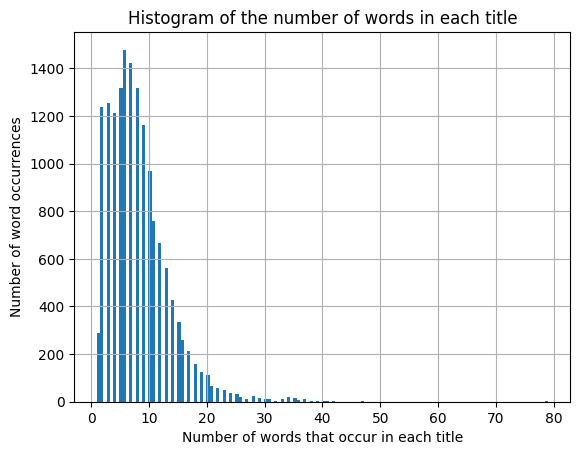

In [39]:
hist = df['title_length'].hist(bins='auto')
plt.ylabel("Number of word occurrences")
plt.xlabel("Number of words that occur in each title")
plt.title('Histogram of the number of words in each title');

## Log

### Part 1: Number of Total Commits

In [40]:
# folder path
infile = r"./data/git_log.log"

c = 0
with open(infile, 'r') as f:
    for line in f:
        for j, word in enumerate(line.split()):
            if word == "commit" and j == 0:
                c+=1
print('The number of commits in this file is %d'%c)

The number of commits in this file is 536


### Part 2: Extract Developer name, Email, Commit Count and last commit date and create a Dataframe

- `time_func`: creates a datetime object from the given string.

In [41]:
from datetime import datetime

def time_func(str_time):
    # default formatting - "%a %b %d %H:%M:%S %Y"
    datetime_object = datetime.strptime(str_time, "%a %b %d %H:%M:%S %Y")
    return datetime_object

At first, the blocks related to commits, were separated and saved in a list **temp**
<br>Finally, by using a **split** function and according to the specific file format, the required information has been saved.

>**⚠ WARNING**: 
>This code just works for this format.


In [42]:
lines = []
with open(infile, 'r') as f:
    for line in f:
        if "Author:" in line:
            lines.append(line)
        elif "Date:" in line:
            lines.append(line)
            
s = pd.Series(lines)
s = s.str.split(n=1)

temp = []
for i in range(len(s)):
    temp.append(s[i][1])
    
s = pd.Series(temp)
s = s.str.rsplit(n=1)

temp = []
for i in range(len(s)):
    if i%2==0:
        temp.append(s[i][0])
        temp.append(s[i][1])
    else:
        temp.append(s[i][0])

- `df`: my dataframe contains the requested information.
- `author` who commited.
- `email` email's author.
- `date` date of commited.


In [43]:
df = pd.DataFrame()
for i in range(0,len(temp),3):
    new_row = {'author':temp[i], 'email':temp[i+1][1:-1], 'date':time_func(temp[i+2])}
    new_df = pd.DataFrame([new_row])
    df = pd.concat([df, new_df], axis=0, ignore_index=True)
co = df['author'].value_counts()

In [44]:
df = df.groupby(['author']).max()
df['commit_count'] = co
df = df.rename(columns={'date': 'last_commit_date'})
for i,j in enumerate(df.index):
    print('Author : ',j,'\tNumber of commit : ',df.iloc[i,2],'\nEmail address : ',df.iloc[i,0],'\tLast commit date :  ', df.iloc[i,1],'\n')

Author :  Ameya Pandilwar 	Number of commit :  2 
Email address :  ameya@pandilwar.com 	Last commit date :   2016-06-19 02:23:53 

Author :  AndrejGajdos 	Number of commit :  1 
Email address :  Andrej1 	Last commit date :   2016-07-28 13:50:07 

Author :  Antoine Rey 	Number of commit :  64 
Email address :  antoine.rey@gmail.com 	Last commit date :   2016-08-19 18:54:56 

Author :  Attilio 	Number of commit :  1 
Email address :  attilio@attil.io 	Last commit date :   2016-06-15 22:46:47 

Author :  Bram Luyten 	Number of commit :  1 
Email address :  bram@mire.be 	Last commit date :   2014-05-11 18:37:42 

Author :  Chris Beams 	Number of commit :  1 
Email address :  cbeams@vmware.com 	Last commit date :   2010-09-02 07:51:24 

Author :  Colin But 	Number of commit :  1 
Email address :  colinbut@users.noreply.github.com 	Last commit date :   2015-11-20 13:56:44 

Author :  Costin Leau 	Number of commit :  28 
Email address :  cleau@vmware.com 	Last commit date :   2010-07-19 14:20

 It was done in the previous part

### Part 3: Developers with Maximum and Minimum Commit count

In [45]:
maxn = df.query('commit_count == commit_count.max()')
minn = df.query('commit_count == commit_count.min()')

print('The most commit happened by :')
for i in maxn.index : print(i,"\t")
print('-----------------------------')
print('The least commit happened by :')
for i in minn.index : print(i,"\t")

The most commit happened by :
Mic 	
-----------------------------
The least commit happened by :
AndrejGajdos 	
Attilio 	
Bram Luyten 	
Chris Beams 	
Colin But 	
Craig Dennis 	
Dapeng 	
Faisal Hameed 	
IHABRITANE 	
Mike Eltsufin 	
TejasM 	
Thomas Risberg 	
Vlad Selpukhin 	
XIAO XI LIU 	
boly38 	
kadinyazilimci 	
lukasz-szewc 	
mklose 	
patrickcrocker 	
srenkens 	
thinksh 	


## Json

### Part 1: Create Dataframe from Json files

In [46]:
import json
from os import walk

# folder path
dir_path = r'./data/Videos/'

df = pd.DataFrame()

# list to store files name
res = []
for (dir_path, dir_names, file_names) in walk(dir_path):
    for i in file_names:
        f = open(dir_path+i)
        data = json.load(f)
        new_row = {'Title':data['title'], 'Lang':data['language'], 
                   'Record_date':data['recorded'], 'url': data['videos'][0]['url'],
                   'Description':data['description'], 
                   'Speakers':data['speakers'],'Duration':data['duration'],
                   'Category': np.nan,'Tags': np.nan,
                  }
        if 'category' in data.keys():
            new_row.update(Category = data['category'])
        if 'tags' in data.keys():
            if len(data['tags'])>0:
                new_row.update(Tags= ' '.join(data['tags']))
                
        row = pd.DataFrame.from_dict(new_row)
        df = pd.concat([df, row], axis=0, ignore_index=True)
        f.close()
df.head(5)

,Title,Lang,Record_date,url,Description,Speakers,Duration,Category,Tags
0,Load Testing a Django Application using LocustIO,eng,2021-06-04,https://www.youtube.com/watch?v=2rvsOQrbLuc,Fed up of using existing tools for determining...,Pranjal Jain,1993,NaN,Django DjangoConEU djangoconeu2021
1,Load Testing a Django Application using LocustIO,eng,2021-06-04,https://www.youtube.com/watch?v=2rvsOQrbLuc,Fed up of using existing tools for determining...,Vibhash Chandra,1993,NaN,Django DjangoConEU djangoconeu2021
2,Python-based data science to understand knowle...,eng,2016-03-10,http://youtu.be/pVd2v7fgxwU,All kinds of businesses are using data science...,Daniel E. Acuna,2700,NaN,NaN
3,Reverse-engineering Ian Bicking's brain: insid...,eng,2011-02-10,https://archive.org/details/pyvideo_568___reve...,- 1 http://us.pycon.org/2011/schedule/session...,Carl Meyer,None,ChiPy,chipy ianbicking pip virtualenv
4,"Build, deploy and scale Django, GraphQL and SPA",eng,2021-06-04,https://www.youtube.com/watch?v=x9I6WaaLC3U,"After building, deploying and scaling a dozen ...",dhilipsiva,1837,NaN,Django DjangoConEU djangoconeu2021


### Part 2: Handle Missing Values

In [47]:
for i in df.columns:
    print(i,df[i].isna().sum())

Title 0
Lang 0
Record_date 0
url 0
Description 0
Speakers 0
Duration 184
Category 38
Tags 188


Fill NA/NaN values with some methods that use for filling holes in reindexed Series.
<br>**ffill**: propagate last valid observation forward to next valid backfill.
<br>**bfill**: use next valid observation to fill gap.

In [48]:
df = df.fillna(method='backfill')
df = df.fillna(method='ffill')
for i in df.columns:
    print(i,df[i].isna().sum())

Title 0
Lang 0
Record_date 0
url 0
Description 0
Speakers 0
Duration 0
Category 0
Tags 0


### Part 3: Title of videos published in 2016

In [49]:
df['Record_date'] = pd.to_datetime(df['Record_date'])
print('The title of the videos released in 2016:')
for j , i in enumerate(df[(df['Record_date'] >= '2016-01-01') & (df['Record_date'] < '2017-01-01')].Title):
    print(j+1,'-' , i,'.')

The title of the videos released in 2016:
1 - Python-based data science to understand knowledge discovery and expertise: A science perspective .
2 - ChiPy Python Mentorship .
3 - The wonder and the horror of the mock module .


### Part 4: Mean, Min, Max, Median of Duration for each Category

In [50]:
x = df.groupby('Category')
print('Mean')
print(x['Duration'].mean(),"\n")
print('Min')
print(x['Duration'].min(),"\n")
print('Max')
print(x['Duration'].max(),"\n")
print('Median')
print(x['Duration'].median(),"\n")

Mean
Category
ChiPy            1285.729412
PyCon US 2015    1436.450292
Name: Duration, dtype: float64 

Min
Category
ChiPy            4.0
PyCon US 2015    5.0
Name: Duration, dtype: float64 

Max
Category
ChiPy            4328.0
PyCon US 2015    3650.0
Name: Duration, dtype: float64 

Median
Category
ChiPy             900.0
PyCon US 2015    1500.0
Name: Duration, dtype: float64 



### Part 5: Create `label` Column

In [51]:
df.loc[df.Duration<1000,'label']=1
df.loc[df.Duration.between(1000, 2000),'label']=2
df.loc[df.Duration>=2000,'label']=3
df.sample(10)

,Title,Lang,Record_date,url,Description,Speakers,Duration,Category,Tags,label
28,Machine Learning 101,eng,2015-04-11,https://www.youtube.com/watch?v=r-1XJBHot58,Machine learning is a crucial part of modern s...,Kyle Kastner,3600.0,PyCon US 2015,lightning talks,3.0
10,Getting to Jython 2.7 and beyond,eng,2015-04-12,https://www.youtube.com/watch?v=hLm3garVQFo,So how did we get to Jython 2.7 anyway? And wh...,Jim Baker,10.0,PyCon US 2015,billmania camera chipy image opencv robot ros,1.0
229,Ultimate Language Shootout IV: QUASI,eng,2013-06-13,http://s3.us.archive.org/ndvchipy/Ultimate_Lan...,,Randy Baxley,7.0,ChiPy,blender chipy chriswebber python3,1.0
64,Genie,eng,2013-01-10,http://s3.us.archive.org/nextdayvideo/chipy/ch...,,Tal Liron,2441.0,ChiPy,Genie vala,3.0
135,The (Slightly) Less Sorry State of SSL,eng,2015-04-11,https://www.youtube.com/watch?v=4o-xqqidvKA,,Benjamin Peterson,26.0,PyCon US 2015,scraping,1.0
69,"Where in your RAM is ""python san_diego.py""?",eng,2015-04-12,https://www.youtube.com/watch?v=tMKXcc2-xO8,"Gumshoes, the rogue program ``san_diego.py`` i...",Ying Li,420.0,PyCon US 2015,Django DjangoConEU djangoconeu2021,1.0
174,A Winning Strategy with The Weakest Link: how ...,eng,2015-04-12,https://www.youtube.com/watch?v=NknSssmLk4w,Working with weak references should not just b...,Jim Baker,80.0,PyCon US 2015,chipy gil python3,1.0
50,Keynote - Van Lindberg - Pycon 2015,eng,2015-04-12,https://www.youtube.com/watch?v=lvlfTZzJ2_Q,,Van Lindberg,3040.0,PyCon US 2015,Django DjangoConEU djangoconeu2021,3.0
20,The request response cycle a Djangonautic journey,eng,2021-06-04,https://www.youtube.com/watch?v=P5gQmlrwLjc,How exactly do web-servers communicate with Dj...,Timothy McCurrach,2354.0,PyCon US 2015,Django DjangoConEU djangoconeu2021,3.0
207,Writing Safe Database Migrations,eng,2021-06-02,https://www.youtube.com/watch?v=q1BlFKXy-BU,Django’s built-in migration framework is great...,Markus Holtermann,1917.0,ChiPy,Django DjangoConEU djangoconeu2021,2.0


### Part 6: First and Last video of each label

In [52]:
print('Label 1')
print('First video : ',df.loc[df['label'] == 1].sort_values(by=['Record_date'])\
                .nlargest(1, 'Duration').Title.to_string(index=False))
print('Last video : ',df.loc[df['label'] == 1].sort_values(by=['Record_date'])\
                .nsmallest(1, 'Duration').Title.to_string(index=False))

Label 1
First video :  Blender 2.5 loves Python 3
Last video :  What happened at #aaronswhack?


In [53]:
print('Label 2')
print('First video : ',df.loc[df['label'] == 2].sort_values(by=['Record_date'])\
                .nlargest(1, 'Duration').Title.to_string(index=False))
print('Last video : ',df.loc[df['label'] == 2].sort_values(by=['Record_date'])\
                .nsmallest(1, 'Duration').Title.to_string(index=False))

Label 2
First video :  Load Testing a Django Application using LocustIO
Last video :  REST on Django


In [54]:
print('Label 3')
print('First video : ',df.loc[df['label'] == 3].sort_values(by=['Record_date'])\
                .nlargest(1, 'Duration').Title.to_string(index=False))
print('Last video : ',df.loc[df['label'] == 3].sort_values(by=['Record_date'])\
                .nsmallest(1, 'Duration').Title.to_string(index=False))

Label 3
First video :  KEYNOTE How to be a djangonaut in a climate eme...
Last video :  Good Test, Bad Test


### (Bonus) part 7: WordCloud of Discription

I use **wordcloud** library for calculating this question.
<br>In the question, it was not mentioned that we cannot use this library :)

In [55]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

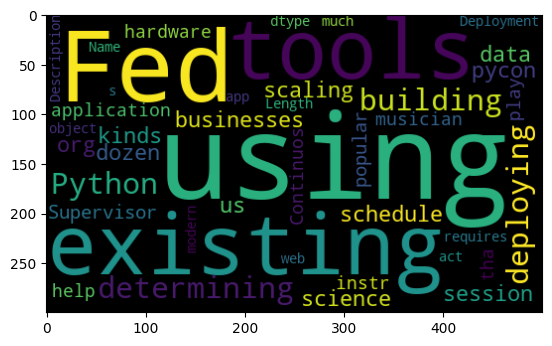

In [56]:
stopwords_newlist = ["https", "co"] + list(STOPWORDS)

allwords=''.join( str(df['Description']))

word_Cloud=WordCloud(width=500, height=300, random_state=21, stopwords=stopwords_newlist,
                     max_font_size=119,max_words=50).generate(allwords)

plt.imshow(word_Cloud, interpolation='bilinear')